# Chapter 7 - Exercise 2: Absenteeism_at_work

### Cho dữ liệu Absenteeism_at_work trong tập tin Absenteeism_at_work.csv
### Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Random Forest để thực hiện việc xác định thời gian vắng mặt theo giờ (Absenteeism time in hours (target)) dựa trên các thông tin được cung cấp.
#### Chi tiết:
1. Đọc dữ liệu. Chuẩn hóa dữ liệu
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
3. Áp dụng Random Forest, Tìm kết quả
4. Kiểm tra độ chính xác
5. Tìm các thuộc tính quan trọng nhất trong tập dữ liệu
6. Trực quan hóa thuộc tính quan trọng
7. Áp dụng lại Random Forest dựa trên các thuộc tính quan trọng, tìm kết quả
8. Kiểm tra độ chính xác
9. Tự cho 1 dữ liệu X_test mới. Ví dụ như: ['Reason for absence', 'Work load Average per day', 'Age',
       'Month of absence', 'Day of the week', 'Hit target',
       'Transportation expense', 'Weight', 'Seasons', 'Height',
       'Distance from Residence to Work', 'Son', 'Pet', 'Service time'] ứng với [ 10., 205.917, 28.,8., 4., 92., 330. ,
        84., 1., 182., 16., 0., 0., 4.]. Tìm kết quả Y test.

### Attribute Information:
1. Individual identification (ID) 
2. Reason for absence (ICD). 
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: 

- I Certain infectious and parasitic diseases 
- II Neoplasms 
- III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 
- IV Endocrine, nutritional and metabolic diseases 
- V Mental and behavioural disorders 
- VI Diseases of the nervous system 
- VII Diseases of the eye and adnexa 
- VIII Diseases of the ear and mastoid process 
- IX Diseases of the circulatory system 
- X Diseases of the respiratory system 
- XI Diseases of the digestive system 
- XII Diseases of the skin and subcutaneous tissue 
- XIII Diseases of the musculoskeletal system and connective tissue 
- XIV Diseases of the genitourinary system 
- XV Pregnancy, childbirth and the puerperium 
- XVI Certain conditions originating in the perinatal period 
- XVII Congenital malformations, deformations and chromosomal abnormalities 
- XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 
- XIX Injury, poisoning and certain other consequences of external causes 
- XX External causes of morbidity and mortality 
- XXI Factors influencing health status and contact with health services. 

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28). 
3. Month of absence 
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) 
6. Transportation expense 
7. Distance from Residence to Work (kilometers) 
8. Service time 
9. Age 
10. Work load Average/day 
11. Hit target 
12. Disciplinary failure (yes=1; no=0) 
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 
14. Son (number of children) 
15. Social drinker (yes=1; no=0) 
16. Social smoker (yes=1; no=0) 
17. Pet (number of pet) 
18. Weight 
19. Height 
20. Body mass index 
21. Absenteeism time in hours (target) 


In [1]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)
# %cd '/content/gdrive/My Drive/LDS6_MachineLearning/practice/Chapter7_Random_Forest/'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split   
import math
# import os
# import sys;
# path=os.path.abspath(os.path.join(os.getcwd(), os.pardir))
#sys.path.insert(0,path)
import import_ipynb
from Demo_Evaluation_Regression_Model import *


importing Jupyter notebook from Demo_Evaluation_Regression_Model.ipynb


In [3]:
data = pd.read_csv("Data\Absenteeism_at_work.csv", sep=";")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average per day        740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [6]:
data.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average per day  ...  Disciplinary failure  Education  Son  \
0                    239.554  ...                     0          1    2   
1                    239.554  ...                     1          1    1   
2                    239.554  ...                     0          1    0   
3                    239.554  ...                     0          1    2   
4                    239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [7]:
data.tail()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average per day  ...  Disciplinary failure  Education  \
735   33                    264.604  ...                     0          1   
736   37                    264.604  ...                     0          3   
737   40                    271.219  ...                     0          1   
738   39                    271.219  ...                     0          1   
739   53                    271.219  ...                     0          1   

     Son  Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
735    2               1              0    1      90     172               30   
736    1               0              0    1      88     172               29   
737    1               1              0    8      98     170               34   
738    2               1              0    2     100     170               35   
739    1               0              0    1      77     175               25   

     Absenteeism time in hours  
735                          8  
736                          4  
737                          0  
738                          0  
739                          0  

[5 rows x 21 columns]

In [8]:
X = data.iloc[:, 1:-1]  #bỏ cột đầu và cuối
y = data.iloc[:,-1]

In [9]:
X.head()

Reason for absence  Month of absence  Day of the week  Seasons  \
0                  26                 7                3        1   
1                   0                 7                3        1   
2                  23                 7                4        1   
3                   7                 7                5        1   
4                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average per day  Hit target  Disciplinary failure  Education  \
0                    239.554          97                     0          1   
1                    239.554          97                     1          1   
2                    239.554          97                     0          1   
3                    239.554          97                     0          1   
4                    239.554          97                     0          1   

   Son  Social drinker  Social smoker  Pet  Weight  Height  Body mass index  
0    2               1              0    1      90     172               30  
1    1               1              0    0      98     178               31  
2    0               1              0    0      89     170               31  
3    2               1              1    0      68     168               24  
4    2               1              0    1      90     172               30

In [10]:
y.head()

0    4
1    0
2    2
3    4
4    2
Name: Absenteeism time in hours, dtype: int64

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 1) 

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
clf=RandomForestRegressor(n_estimators=250,min_samples_leaf=2)# 250 cây, mỗi lá ít nhất 2 phần tử

In [14]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
type(y_test)

pandas.core.series.Series

In [16]:
type(y_pred)

numpy.ndarray

In [17]:
from sklearn import metrics
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 140.17353055947103


In [18]:
# Evaluation
print("The R^2: ",clf.score(X,y)*100,"%")
print("The Training R^2 is: ",clf.score(X_train,y_train)*100,"%")
print("The Testing R^2 is: ",clf.score(X_test,y_test)*100,"%")
# overfitting

The R^2:  54.20097416781433 %
The Training R^2 is:  68.5541862664281 %
The Testing R^2 is:  20.21473738469345 %


C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


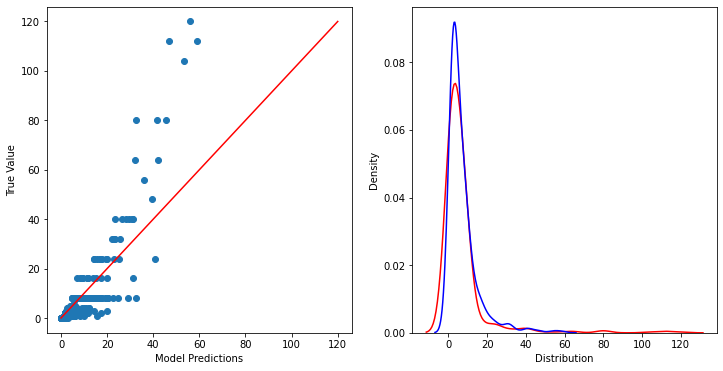

In [19]:
Visualize_model_reg(y_train,clf.predict(X_train))

In [ ]:
# phần đầu thì dự đoán đúng, phần sau thì lệch hẳn

In [20]:
# => The Training  R^2 >> Testing R^2 => Overfitting => Solution??? có thể do quá nhiều feature-> thử giảm chiều hoặc tunning parameters, 
# đến thế mà vẫn kém R^2 thì đổi thuật toán khác, nếu vận overfit->chia cột target ra các bin ->target từ regres thành classification
#sau khi chia bins, hiệu suất test cải thiện rõ ràng

In [21]:
# Finding Important Features in Scikit-learn
import pandas as pd
clf.feature_importances_
feature_imp = pd.Series(clf.feature_importances_, 
              index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

Reason for absence                 0.268778
Work load Average per day          0.153465
Age                                0.097268
Month of absence                   0.069862
Hit target                         0.062068
Transportation expense             0.051346
Day of the week                    0.046347
Height                             0.040457
Son                                0.039912
Weight                             0.038774
Distance from Residence to Work    0.031607
Seasons                            0.026883
Pet                                0.019400
Service time                       0.018415
Social drinker                     0.014651
Body mass index                    0.012677
Disciplinary failure               0.004075
Social smoker                      0.002344
Education                          0.001670
dtype: float64

In [22]:
type(feature_imp)

pandas.core.series.Series

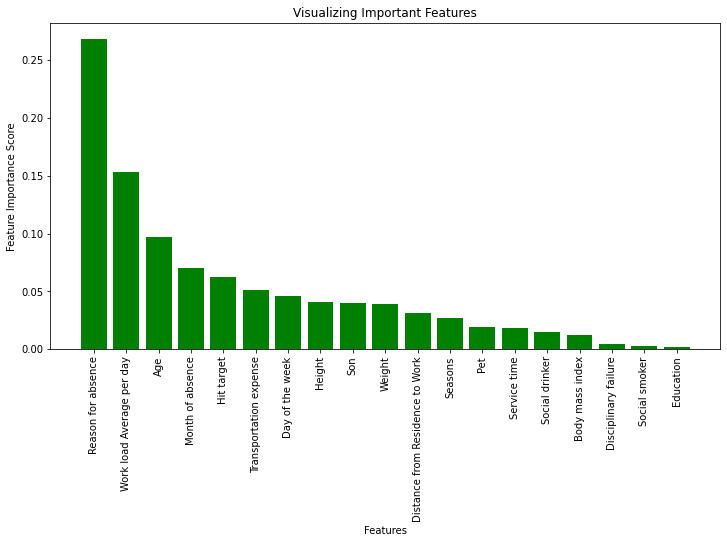

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(12,6))
plt.bar(feature_imp.index, feature_imp, color="g")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation = "vertical")
plt.show()

In [24]:
feature_imp[feature_imp >0.05].sum()# xem tổng nó có ổn

0.7027874152979994

In [25]:
feature_imp_select = feature_imp[feature_imp >0.05]
feature_imp_select

Reason for absence           0.268778
Work load Average per day    0.153465
Age                          0.097268
Month of absence             0.069862
Hit target                   0.062068
Transportation expense       0.051346
dtype: float64

In [26]:
feature_imp_select.index

Index(['Reason for absence', 'Work load Average per day', 'Age',
       'Month of absence', 'Hit target', 'Transportation expense'],
      dtype='object')

In [27]:
# Tạo lại dữ liệu huấn luyện và test sau khi bỏ đi các thuộc tính ít quan trọng hơn
# Split dataset into features and labels
X1 = data[feature_imp_select.index]  
y1 = data['Absenteeism time in hours']

In [28]:
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                        test_size=0.3, 
                                                        random_state = 1) 

In [29]:
clf1=RandomForestRegressor(n_estimators=100)
clf1.fit(X1_train,y1_train)

y1_pred=clf1.predict(X1_test)

In [30]:
print("Mean Squared Error:", metrics.mean_squared_error(y1_test, y1_pred))

Mean Squared Error: 148.26210561539267


In [31]:
# Evaluation
print("The R^2: ",clf1.score(X1,y1)*100,"%")
print("The Training R^2: ",clf1.score(X1_train,y1_train)*100,"%")
print("The Testing R^2: ",clf1.score(X1_test,y1_test)*100,"%")

The R^2:  62.72032538759096 %
The Training R^2:  82.6189177708049 %
The Testing R^2:  15.610807652421165 %


In [32]:
# => The Training  R^2 >> Testing R^2 => Overfitting => Solution???

In [33]:
a = X1.iloc[20]
X_new = a.values

In [34]:
clf1.predict([X_new]) 

array([19.62])

Tunning Parameter

In [35]:
param_grid= {'bootstrap': [True, False],
 'max_depth': [5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt', 'None'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 300, 400]}

In [38]:
from sklearn.model_selection import GridSearchCV
model_tune=GridSearchCV(RandomForestRegressor(),param_grid, cv=5)

In [39]:
import time
start=time.time()
model_tune.fit(X_train,y_train)
end==time.time()
print('Time in miliseconds', (end-start)*1000)

C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\chuha\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

In [ ]:
model_tune.score(X_train,y_train)
model_tune.score(X_test,y_test)